# Fort Collins Bridge Dashboard - update ArcGIS Online

In [59]:
# Resources
# ESRI overwriting feature layers in AGOL:
# https://developers.arcgis.com/python/sample-notebooks/overwriting-feature-layers/

# Downloading the arcgis module
# https://developers.arcgis.com/python/guide/install-and-set-up/

# Running notebook from terminal
# https://nbconvert.readthedocs.io/en/latest/execute_api.html

In [60]:
#### Import the ArcGIS Python API ####

from arcgis.gis import *
# from arcgis import features
from arcgis.features import *
from IPython.display import display

#### Import packages ####

import pandas as pd
import numpy as np
import os
import time
import glob

# Get most recent bridge data csv

In [61]:
# Get current directory (assuming csv's are stored in the same file as the notebook)
# https://github.com/ipython/ipython/issues/10123

workbookDir = os.getcwd()
workbookDir

'C:\\Users\\Daniel.Aragon\\Desktop\\DJA_TEMP\\FortCollins\\PythonScripts'

In [62]:
# Get most recently created csv using glob.  Change to 'getmtime' if newest modification date is needed
# https://stackoverflow.com/questions/18279063/python-find-newest-file-with-mp3-extension-in-directory

newestcsv = max(glob.iglob('*.csv'), key=os.path.getctime)
print ('newest .csv file: ',newestcsv)

newest .csv file:  bridge_data_20180818221918.csv


# Read newestcsv into pandas dataframe

In [63]:
# read the initial csv
# csv1 = 'temp_bridge_data.csv'
csv1 = newestcsv
FC_bridgeData = pd.read_csv(csv1)
FC_bridgeData.head()

,Unnamed: 0,bridge_id,brkey,struct_num,yearbuilt,latitude,longitude,scourcrit,suff_rate,nbi_rating,in_modtime,Inspection_number
0,0,FCLMY-0.2-TRILB,FCLMY-0.2-TRILB,FCLMY-0.2-TRILB,1986.0,40.497778,-105.058056,8,95.6,0,2016-01-11 11:46:56,1
1,1,FCLMY-1.2-VINE,FCLMY-1.2-VINE,FCLMY-1.2-VINE,1958.0,40.613333,-105.057500,8,68.2,0,2015-10-23 15:17:25,1
2,2,FCLNDS-0.1-BDWK,FCLNDS-0.1-BDWK,FCLNDS-0.1-BDWK,1982.0,40.533611,-105.072222,8,97.8,0,2015-09-19 12:47:53,1
3,3,FCMNR-0.0-CLGE,FCMNR-0.0-CLGE,FCMNR-0.0-CLGE,1974.0,40.540000,-105.076389,8,19.8,1,2015-10-15 12:41:16,1
4,4,FCMOSS-0.1-BENT,FCMOSS-0.1-BENT,FCMOSS-0.1-BENT,1985.0,40.530833,-105.089167,5,97.4,0,2015-11-16 09:48:44,1


# Connect to Denver_Field_User agol account

In [64]:
#Access the AGOL account 
gis = GIS("https://www.arcgis.com", "Denver_Field_User", "165SouthUnion")

<User username:Denver_Field_User>
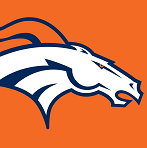

In [65]:
# Get user data
user = gis.users.get('Denver_Field_User')
user

# Check for existing feature layer, create boolean variable to store result

In [66]:
# check if service name is available (True means feature layer does not exist, False means service layer already exists)
search_result1 = gis.content.search(query='Latest Fort Collins Bridge Inspection Data csv', item_type="csv")

print ('length of search result: ',len(search_result1))

if len(search_result1) == 0:
    layer_available = True
else:
    layer_available = False


layer_available

length of search result:  1


False

# Upload the csv into a new feature layer OR overwrite existing to AGOL

In [67]:
if layer_available == True:
  
    # add the csv as an item 
    item_prop = {'title':'Latest Fort Collins Bridge Inspection Data csv'}
    csv_item = gis.content.add(item_properties=item_prop, data=csv1)
    csv_item
    
    # publish the csv item into a feature layer 
    bridge_item = csv_item.publish()
    bridge_item.protect(enable = False)
    bridge_item
    
    # update the item metadata
    item_prop = {'title':'Latest Fort Collins Bridge Inspections'}
    bridge_item.update(item_properties = item_prop)
    
    # Display the web location of the feature layer
    bridge_item.url
    
    # Confirm the number of features in the feature layer
    bridge_flayer = bridge_item.layers[0] #there is only 1 layer
    bridge_flayer.query(return_count_only=True) #get the total number of features
    
    print('Bridge Inspection Data added to AGOL account')
    
else:
    # identify the feature layer to update: bridge_item (published .csv file)
    bridge_flayer_collection = FeatureLayerCollection.fromitem(bridge_item)
    
    # use the overwrite() method to update the bridge item which can be accessed using the manager property
    bridge_flayer_collection.manager.overwrite(newestcsv)
    
    # Confirm the number of features in the feature layer
    bridge_flayer = bridge_item.layers[0] #there is only 1 layer
    bridge_flayer.query(return_count_only=True) #get the total number of features
    
    print('Bridge Inspection Data updated with new data to AGOL account')

Bridge Inspection Data updated with new data to AGOL account


In [71]:
# Bring up map of points...if javascript widget is installed correctly

map1 = gis.map("Palm Springs, CA")
map1


Widget Javascript not detected.  It may not be installed or enabled properly.
